# 데이터셋 다운 : https://url.kr/igc6r3

- 사용자에서 py_data 에다가 다운로드 받은 파일 넣기

In [20]:
# 판다스에서 외부 파일을 불러오는 것은 read_excel
# 특별 설정 없으면 column 으로 됨

In [129]:
import pandas as pd
df_car = pd.read_excel('c:/py_data/car_in_seoul.xlsx', # 확장자는 엑셀 파일
                       header=1, # 0으로 하면 제일 위에 있는거 선택되니까 1번부터
                       usecols="A, B, C, G, K, O, S") # 여기 행을 보면 합계 승용차로 되어있는데 여기서 3개 4개씩 나눠진다. 이게 a b c 고 합쳐진게 그다음 순서 g k
df_car.head() # 소계 부분이 2번째에 있음

,기간,자치구,소계,소계.1,소계.2,소계.3,소계.4
0,2017,서울시,3116256,2641190,127564,339921,7581
1,2017,종로구,50828,41115,4055,5469,189
2,2017,중구,51540,40523,3508,7294,215
3,2017,용산구,77458,67335,2783,7221,119
4,2017,성동구,103116,87762,3698,11459,197


In [131]:
# 엑셀 테이블은 멀티 인덱스이다. 불러올때는 인덱스는 하나만 불러올 수 있음.

In [133]:
import pandas as pd
df_par = pd.read_excel('c:/py_data/par_in_seoul.xlsx', 
                       header=2, # 개소 면수가 3번째에 있음
                       usecols="A, B, C, I, O, W") 
df_par.head()

,기간,자치구,개소,개소.3,개소.6,개소.10
0,2017,서울시,308025,8576,1977,297472
1,2017,종로구,7220,148,103,6969
2,2017,중구,4152,151,94,3907
3,2017,용산구,7291,362,75,6854
4,2017,성동구,6658,264,65,6329


In [135]:
# 개소 개소3 이런거 가져올때 이건 이제 파이썬으로 와서 다 문자열임. 그래서 공백이나 다른게 들어가져있을 수도 있음. 그래서 확인읗 해줘야함

In [137]:
df_car.columns[3]

'소계.1'

In [139]:
df_car['소계.1'] # columns[3] 을 넣어도 됨

0     2641190
1       41115
2       40523
3       67335
4       87762
5       82951
6       79837
7       92596
8      100028
9       63987
10      82048
11     134400
12     109372
13      73356
14      99278
15     128605
16     171936
17     119141
18      68119
19     118426
20      91607
21     103742
22     158153
23     213956
24     197661
25     115256
26          -
Name: 소계.1, dtype: object

In [141]:
df_par.columns

Index(['기간', '자치구', '개소', '개소.3', '개소.6', '개소.10'], dtype='object')

In [143]:
df_car.rename (columns={df_car.columns[0]:"년도",
                        df_car.columns[1]:"자치구",
                        df_car.columns[2]:"합계",
                        df_car.columns[3]:"승용차",
                        df_car.columns[4]:"승합차",
                        df_car.columns[5]:"화물차",
                        df_car.columns[6]:"특수차"},
               inplace = True)
df_car.head()
                        

,년도,자치구,합계,승용차,승합차,화물차,특수차
0,2017,서울시,3116256,2641190,127564,339921,7581
1,2017,종로구,50828,41115,4055,5469,189
2,2017,중구,51540,40523,3508,7294,215
3,2017,용산구,77458,67335,2783,7221,119
4,2017,성동구,103116,87762,3698,11459,197


In [145]:
df_par.rename (columns={df_par.columns[0]:"년도",
                        df_par.columns[1]:"자치구",
                        df_par.columns[2]:"합계",
                        df_par.columns[3]:"노상",
                        df_par.columns[4]:"노외",
                        df_par.columns[5]:"건축물부설"},
                inplace = True)
df_par.head()

,년도,자치구,합계,노상,노외,건축물부설
0,2017,서울시,308025,8576,1977,297472
1,2017,종로구,7220,148,103,6969
2,2017,중구,4152,151,94,3907
3,2017,용산구,7291,362,75,6854
4,2017,성동구,6658,264,65,6329


In [147]:
df_car.info() # non-null null이 없다, object - 문자열을 표현 위에 숫자가 되어있는데 밑에는 object
# 숫자지만 문지열로 지정될 가능성, 숫자로 되어있는데 null이 아니라 가끔 엑셀 부분에 - 표시 쨋든 이건 문자열임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      27 non-null     int64 
 1   자치구     27 non-null     object
 2   합계      27 non-null     object
 3   승용차     27 non-null     object
 4   승합차     27 non-null     object
 5   화물차     27 non-null     object
 6   특수차     27 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.6+ KB


In [149]:
df_par.info() # entries 26개의 행이다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      26 non-null     int64 
 1   자치구     26 non-null     object
 2   합계      26 non-null     int64 
 3   노상      26 non-null     int64 
 4   노외      26 non-null     int64 
 5   건축물부설   26 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [151]:
# 인덱스가 df_Car가 하나더 많다. 기타 때문에

In [165]:
df_car

,년도,자치구,합계,승용차,승합차,화물차,특수차
0,2017,서울시,3116256,2641190,127564,339921,7581
1,2017,종로구,50828,41115,4055,5469,189
2,2017,중구,51540,40523,3508,7294,215
3,2017,용산구,77458,67335,2783,7221,119
4,2017,성동구,103116,87762,3698,11459,197
5,2017,광진구,98631,82951,4169,11248,263
6,2017,동대문구,97507,79837,4249,13244,177
7,2017,중랑구,113916,92596,5305,15619,396
8,2017,성북구,117209,100028,5745,11311,125
9,2017,강북구,77820,63987,4268,9416,149


In [167]:
# 맨밑에 기타를 보면 안다. 밑에 - 때문에 object로 알 수 있다

In [169]:
df_par

,년도,자치구,합계,노상,노외,건축물부설
0,2017,서울시,308025,8576,1977,297472
1,2017,종로구,7220,148,103,6969
2,2017,중구,4152,151,94,3907
3,2017,용산구,7291,362,75,6854
4,2017,성동구,6658,264,65,6329
5,2017,광진구,16304,359,70,15875
6,2017,동대문구,9485,30,57,9398
7,2017,중랑구,12170,525,81,11564
8,2017,성북구,13038,125,154,12759
9,2017,강북구,10528,23,59,10446


In [171]:
# 여기는 기타가 없음
# 그래서 해당 인덱스 삭제할거임

In [177]:
# 구 별 비교니까 서울시는 필요 없음
# 승용차의 불필요한 행을 삭제
# (서울시, 기타)
# 주차장 서울시도 삭제
df_car.drop([0],inplace=True)
df_car.drop([26],inplace=True)
df_par.drop([0],inplace=True)

KeyError: '[0] not found in axis'

In [183]:
df_car.info() # 인덱스 25게 확인 # 아직도 object가 걸림

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      25 non-null     int64 
 1   자치구     25 non-null     object
 2   합계      25 non-null     object
 3   승용차     25 non-null     object
 4   승합차     25 non-null     object
 5   화물차     25 non-null     object
 6   특수차     25 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.5+ KB


In [185]:
df_par.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      25 non-null     int64 
 1   자치구     25 non-null     object
 2   합계      25 non-null     int64 
 3   노상      25 non-null     int64 
 4   노외      25 non-null     int64 
 5   건축물부설   25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [189]:
a = 1 
a = str(a)
a

'1'

In [191]:
a = int(a)
a

1

In [193]:
# 컬럼 데이터 형식 변환
df_car['합계'] = df_car['합계'].astype(int)
df_car['승용차'] = df_car['승용차'].astype(int)
df_car['승합차'] = df_car['승합차'].astype(int)
df_car['화물차'] = df_car['화물차'].astype(int)
df_car['특수차'] = df_car['특수차'].astype(int)
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      25 non-null     int64 
 1   자치구     25 non-null     object
 2   합계      25 non-null     int32 
 3   승용차     25 non-null     int32 
 4   승합차     25 non-null     int32 
 5   화물차     25 non-null     int32 
 6   특수차     25 non-null     int32 
dtypes: int32(5), int64(1), object(1)
memory usage: 1.0+ KB


In [201]:
# df_Car에
# 승용차비율, 승합차비율, 화물차비율
# 계산필드 추가
# 없던걸 계산하면 필드에 추가가 된다고 이해하자
df_car['승용차비율']=(df_car['승용차']/df_car['합계'])*100
df_car['승합차비율']=(df_car['승합차']/df_car['합계'])*100
df_car['화물차비율']=(df_car['화물차']/df_car['합계'])*100
df_car.head(10)

,년도,자치구,합계,승용차,승합차,화물차,특수차,승용차비율,승합차비율,화물차비율
1,2017,종로구,50828,41115,4055,5469,189,80.890454,7.977886,10.759817
2,2017,중구,51540,40523,3508,7294,215,78.624369,6.806364,14.152115
3,2017,용산구,77458,67335,2783,7221,119,86.930982,3.592915,9.322472
4,2017,성동구,103116,87762,3698,11459,197,85.109973,3.586252,11.112727
5,2017,광진구,98631,82951,4169,11248,263,84.102361,4.226866,11.404122
6,2017,동대문구,97507,79837,4249,13244,177,81.878224,4.357636,13.582615
7,2017,중랑구,113916,92596,5305,15619,396,81.284455,4.656940,13.710980
8,2017,성북구,117209,100028,5745,11311,125,85.341569,4.901501,9.650283
9,2017,강북구,77820,63987,4268,9416,149,82.224364,5.484451,12.099717
10,2017,도봉구,97323,82048,4129,10937,209,84.304841,4.242574,11.237837


In [203]:
# 노상비율, 노외비율, 건축물비율 계산필드 추가 
df_par['노상비율']=df_par['노상']/df_par['합계']*100
df_par['노외비율']=df_par['노외']/df_car['합계']*100
df_par['건축물비율']=df_par['건축물부설']/df_par['합계']*100
df_car.head(10)

,년도,자치구,합계,승용차,승합차,화물차,특수차,승용차비율,승합차비율,화물차비율
1,2017,종로구,50828,41115,4055,5469,189,80.890454,7.977886,10.759817
2,2017,중구,51540,40523,3508,7294,215,78.624369,6.806364,14.152115
3,2017,용산구,77458,67335,2783,7221,119,86.930982,3.592915,9.322472
4,2017,성동구,103116,87762,3698,11459,197,85.109973,3.586252,11.112727
5,2017,광진구,98631,82951,4169,11248,263,84.102361,4.226866,11.404122
6,2017,동대문구,97507,79837,4249,13244,177,81.878224,4.357636,13.582615
7,2017,중랑구,113916,92596,5305,15619,396,81.284455,4.656940,13.710980
8,2017,성북구,117209,100028,5745,11311,125,85.341569,4.901501,9.650283
9,2017,강북구,77820,63987,4268,9416,149,82.224364,5.484451,12.099717
10,2017,도봉구,97323,82048,4129,10937,209,84.304841,4.242574,11.237837


In [208]:
#df_car1 = df_car # 이렇게 하면 안됨. 둘다 같은 메모리를 가리키고 있기 때문에 이렇게 하면 1을 수정하면 원본도 바뀜

In [210]:
df_car1 = df_car.copy()
df_par1 = df_par.copy()

In [216]:
#df_car1 에 불필요한 필드
# 승용차 승합차 화물차 특수차 삭제
del df_car1["승용차"]
del df_car1["승합차"]
del df_car1["화물차"]
del df_car1["특수차"]
df_car1.head()

KeyError: '승용차'

In [218]:
df_car1.head()

,년도,자치구,합계,승용차비율,승합차비율,화물차비율
1,2017,종로구,50828,80.890454,7.977886,10.759817
2,2017,중구,51540,78.624369,6.806364,14.152115
3,2017,용산구,77458,86.930982,3.592915,9.322472
4,2017,성동구,103116,85.109973,3.586252,11.112727
5,2017,광진구,98631,84.102361,4.226866,11.404122


In [220]:
del df_par1["노상"]
del df_par1["노외"]
del df_par1["건축물부설"]
df_par1.head(2)

,년도,자치구,합계,노상비율,노외비율,건축물비율
1,2017,종로구,7220,2.049861,0.202644,96.523546
2,2017,중구,4152,3.636802,0.182383,94.099229


In [222]:
# 합치는 방법에는 car1을 위에 두고 par1을 아래에
# 좌 우로 붙이는 방법
# 좌우 가 맞음 년도랑 자치구가 똑같이 있기때문에
# 좌 우로 합치고 종로구 중구 용산구 같으면 잘라서 옆에 붙이면되는데 혹시나 다를 수도 있으니까

In [224]:
data_seoul = pd.merge(df_car1, df_par1,
                      on = "자치구") #on은 자치구를 기준으로라는 듯
data_seoul.head(2)

,년도_x,자치구,합계_x,승용차비율,승합차비율,화물차비율,년도_y,합계_y,노상비율,노외비율,건축물비율
0,2017,종로구,50828,80.890454,7.977886,10.759817,2017,7220,2.049861,0.202644,96.523546
1,2017,중구,51540,78.624369,6.806364,14.152115,2017,4152,3.636802,0.182383,94.099229


In [236]:
data_seoul.rename(columns={data_seoul.columns[0]:"년도",
                           data_seoul.columns[2]:"차량합계",
                           data_seoul.columns[7]:"주차장합계"},
                  inplace=True)
del data_seoul["년도_y"]
# data_seoul에서 자치구를 인덱스 키로 변경합니다
data_seoul.set_index("자치구",inplace=True)
data_seoul.head(2)

,년도,차량합계,승용차비율,승합차비율,화물차비율,주차장합계,노상비율,노외비율,건축물비율
자치구,,,,,,,,,
종로구,2017,50828,80.890454,7.977886,10.759817,7220,2.049861,0.202644,96.523546
중구,2017,51540,78.624369,6.806364,14.152115,4152,3.636802,0.182383,94.099229


C:\Users\705-8\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\705-8\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\705-8\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\705-8\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\705-8\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\705-8\anaconda

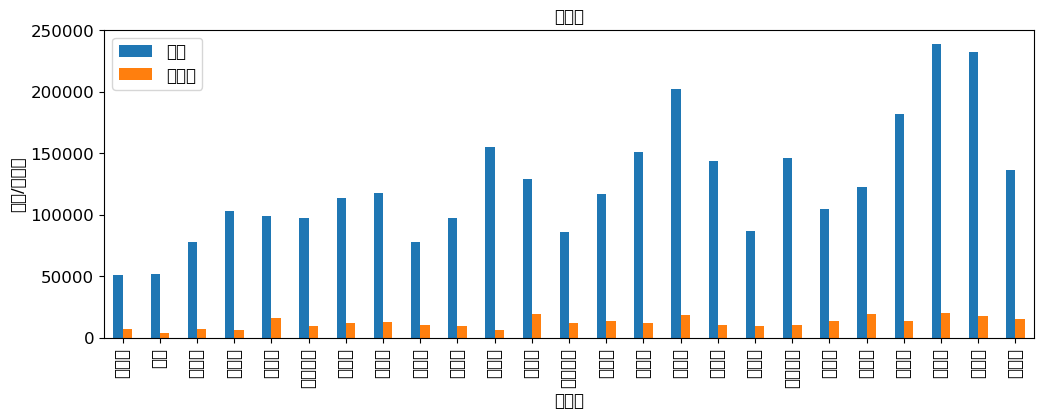

In [239]:
# 그래프를 그려준다
# 완성된 데이터를 이용하여 차트를 출력한다
# kind는 바형태로  legend-> 범례 는 표시 텍스트 사이즈는 12
# set_xlabel x축에는 지치구 y축에는 12사이즈로 차량/주차장 

import matplotlib.pyplot as plt

ax = data_seoul[['차량합계','주차장합계']].plot(kind='bar',
                                           title='주차장',
                                           figsize=(12,4),
                                           legend=True,
                                           fontsize=12)
ax.set_xlabel("자치구", fontsize=12)  # x축 정보 표시
ax.set_ylabel("차량/주차장", fontsize=12) # y축 정보 표시
ax.legend(["차량","주차장"], fontsize=12) # 범례 지정
plt.show()

In [301]:
 # 아이파이썬 자체에서 아나콘다 설치할때 이 컴퓨터에 있는 폰트를 리스트업하는데 지금 다운로드 한다고 설정이 안됨. 내가 가지고 있는 폰트를 재정의 해야함

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔글꼴 경로 설정
font_path = 'C:/Windows/Fonts/gulim.ttc'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rc('font', family=font_name)

# 구글에서 불러옴

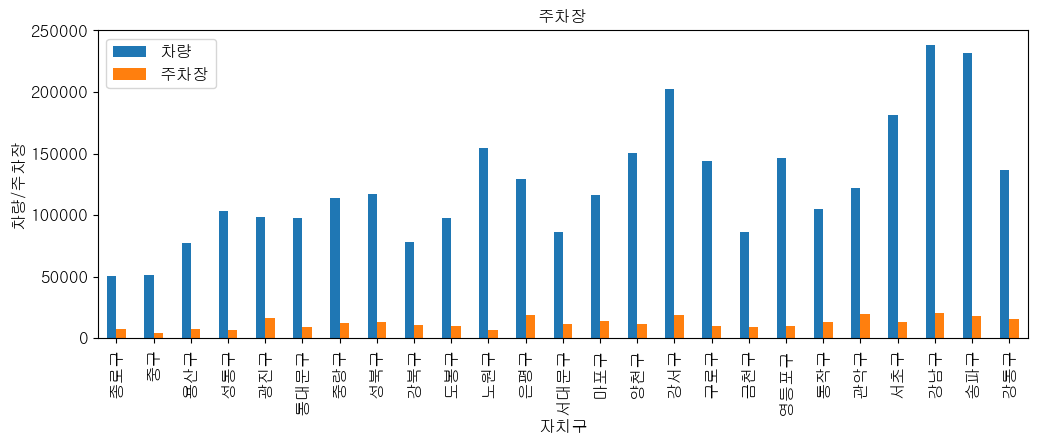

In [325]:
# 그래프를 그려준다
# 완성된 데이터를 이용하여 차트를 출력한다
# kind는 바형태로  legend-> 범례 는 표시 텍스트 사이즈는 12
# set_xlabel x축에는 지치구 y축에는 12사이즈로 차량/주차장 
# bar barch
import matplotlib.pyplot as plt

ax = data_seoul[['차량합계','주차장합계']].plot(kind='bar',
                                           title='주차장',
                                           figsize=(12,4),
                                           legend=True,
                                           fontsize=12)
ax.set_xlabel("자치구", fontsize=12)  # x축 정보 표시
ax.set_ylabel("차량/주차장", fontsize=12) # y축 정보 표시
ax.legend(["차량","주차장"], fontsize=12) # 범례 지정
plt.show()

In [305]:
# 시니어들은 시각화 자료를 좋아함

In [307]:
# 데이터프레임.loc['인덱스명']
data_seoul.loc['종로구']

년도        2017.000000
차량합계     50828.000000
승용차비율       80.890454
승합차비율        7.977886
화물차비율       10.759817
주차장합계     7220.000000
노상비율         2.049861
노외비율         0.202644
건축물비율       96.523546
Name: 종로구, dtype: float64

In [309]:
data_seoul.loc[['영등포구','종로구','구로구','강서구']] # 여러개 하면 데이터 프레임이 나오는거임

,년도,차량합계,승용차비율,승합차비율,화물차비율,주차장합계,노상비율,노외비율,건축물비율
자치구,,,,,,,,,
영등포구,2017,146150,81.030448,4.249743,13.971947,10018,21.730884,0.047212,77.580355
종로구,2017,50828,80.890454,7.977886,10.759817,7220,2.049861,0.202644,96.523546
구로구,2017,143960,82.759794,4.727008,12.306891,10219,2.925922,0.040289,96.506507
강서구,2017,202063,85.090294,3.962626,10.759021,18630,3.735910,0.027714,95.963500


In [311]:
data_seoul.iloc[0]

년도        2017.000000
차량합계     50828.000000
승용차비율       80.890454
승합차비율        7.977886
화물차비율       10.759817
주차장합계     7220.000000
노상비율         2.049861
노외비율         0.202644
건축물비율       96.523546
Name: 종로구, dtype: float64

In [313]:
data_seoul.iloc[0:6]

,년도,차량합계,승용차비율,승합차비율,화물차비율,주차장합계,노상비율,노외비율,건축물비율
자치구,,,,,,,,,
종로구,2017,50828,80.890454,7.977886,10.759817,7220,2.049861,0.202644,96.523546
중구,2017,51540,78.624369,6.806364,14.152115,4152,3.636802,0.182383,94.099229
용산구,2017,77458,86.930982,3.592915,9.322472,7291,4.965025,0.096827,94.006309
성동구,2017,103116,85.109973,3.586252,11.112727,6658,3.965155,0.063036,95.058576
광진구,2017,98631,84.102361,4.226866,11.404122,16304,2.201914,0.070972,97.368744
동대문구,2017,97507,81.878224,4.357636,13.582615,9485,0.316289,0.058457,99.082762


In [315]:
data_seoul.loc['중구':'동대문구'] # 숫자는 나 빼고 한글은 내가 입력한 곳 까지

,년도,차량합계,승용차비율,승합차비율,화물차비율,주차장합계,노상비율,노외비율,건축물비율
자치구,,,,,,,,,
중구,2017,51540,78.624369,6.806364,14.152115,4152,3.636802,0.182383,94.099229
용산구,2017,77458,86.930982,3.592915,9.322472,7291,4.965025,0.096827,94.006309
성동구,2017,103116,85.109973,3.586252,11.112727,6658,3.965155,0.063036,95.058576
광진구,2017,98631,84.102361,4.226866,11.404122,16304,2.201914,0.070972,97.368744
동대문구,2017,97507,81.878224,4.357636,13.582615,9485,0.316289,0.058457,99.082762


In [327]:
data_seoul1 = data_seoul.loc [["강서구", "강남구",
                               "서초구", "송파구",
                               "영등포구", "동대문구",
                               "종로구"]] # 새로운 객체 프레임을 서울에 입력하는 형태라서 원본데이터에 상관이 없다
data_seoul1

,년도,차량합계,승용차비율,승합차비율,화물차비율,주차장합계,노상비율,노외비율,건축물비율
자치구,,,,,,,,,
강서구,2017,202063,85.090294,3.962626,10.759021,18630,3.735910,0.027714,95.963500
강남구,2017,238311,89.780161,2.861807,7.196479,20348,0.353843,0.048676,99.076076
서초구,2017,181546,87.114560,3.042755,9.657057,13360,6.205090,0.049574,93.121257
송파구,2017,231819,85.265228,3.312929,11.285529,18009,2.704203,0.064706,96.462880
영등포구,2017,146150,81.030448,4.249743,13.971947,10018,21.730884,0.047212,77.580355
동대문구,2017,97507,81.878224,4.357636,13.582615,9485,0.316289,0.058457,99.082762
종로구,2017,50828,80.890454,7.977886,10.759817,7220,2.049861,0.202644,96.523546


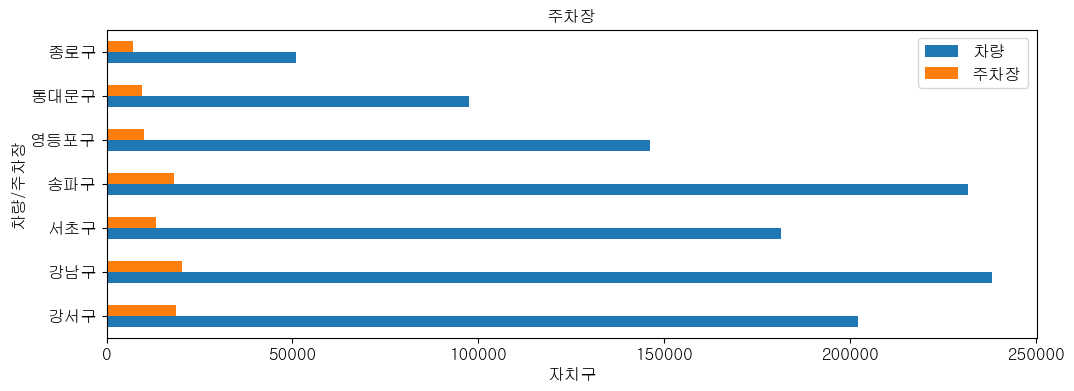

In [334]:
ax = data_seoul1[['차량합계','주차장합계']].plot(kind='barh',
                                           title='주차장',
                                           figsize=(12,4),
                                           legend=True,
                                           fontsize=12)
ax.set_xlabel("자치구", fontsize=12)  # x축 정보 표시
ax.set_ylabel("차량/주차장", fontsize=12) # y축 정보 표시
ax.legend(["차량","주차장"], fontsize=12) # 범례 지정
plt.show()